<a href="https://colab.research.google.com/github/NandiDwiHS/Forecasting-Jumlah-Siswa-Baru-Menggunakan-ARIMA-LSTM-GRU/blob/main/Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


=== DATAINFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   tahun   21 non-null     int64
 1   siswa   21 non-null     int64
dtypes: int64(2)
memory usage: 468.0 bytes
=== STATISTIK DESKRIPTIF ===
             tahun      siswa
count    21.000000  21.000000
mean   2014.000000  43.428571
std       6.204837   7.612959
min    2004.000000  29.000000
25%    2009.000000  40.000000
50%    2014.000000  43.000000
75%    2019.000000  50.000000
max    2024.000000  59.000000


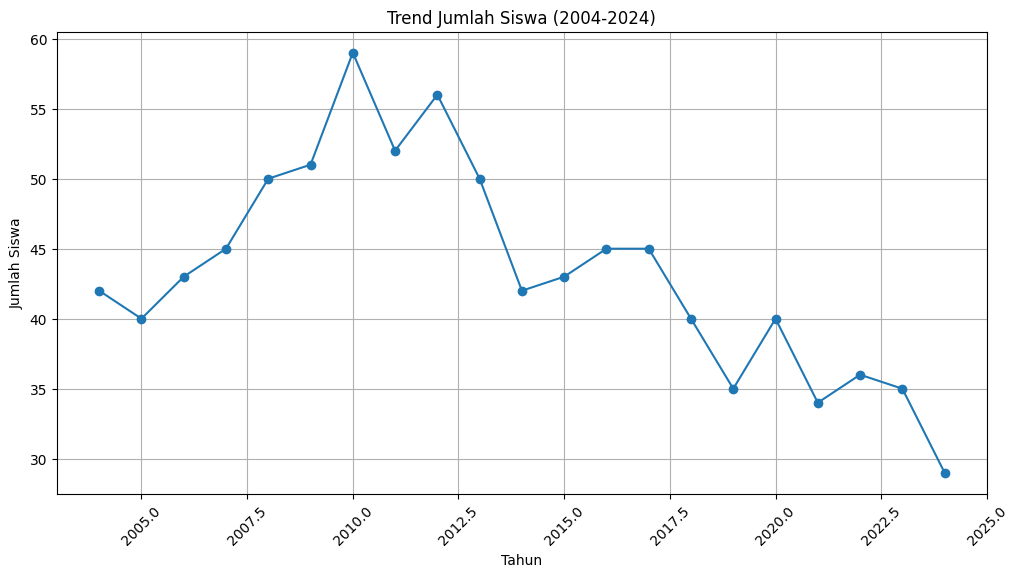

=== DATAFRAME SEBELUM MENGUBAH INDEX ===
   tahun  siswa
0   2004     42
1   2005     40
2   2006     43
3   2007     45
4   2008     50
=== DATAINFO SEBELUM MENGUBAH INDEX ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   tahun   21 non-null     datetime64[ns]
 1   siswa   21 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 468.0 bytes
None
=== DATAFRAME SETELAH MENGUBAH INDEX MENJADI DATETIME ===
            siswa
tahun            
2004-01-01     42
2005-01-01     40
2006-01-01     43
2007-01-01     45
2008-01-01     50
=== DATAINFO SETELAH MENGUBAH INDEX MENJADI DATETIME ===
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2004-01-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   siswa   21 non-null     int64
dtypes: in

In [ ]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
path = '/content/drive/MyDrive/Kuliah/Skripsi/DataMurid.csv'
df = pd.read_csv(path,sep=';')

print("=== DATAINFO ===")
df.info()

# Statistik Deskriptif
print("=== STATISTIK DESKRIPTIF ===")
print(df.describe())

# Visualisasi Data
plt.figure(figsize=(12,6))
plt.plot(df['tahun'], df['siswa'], marker='o')
plt.title('Trend Jumlah Siswa (2004-2024)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Siswa')
plt.grid()
plt.xticks(rotation=45)
plt.show()

# Tampilkan 5 baris pertama sebelum mengubah indeks
print("=== DATAFRAME SEBELUM MENGUBAH INDEX ===")
print(df.head())

# Ubah 'tahun' menjadi tipe datetime (format tahunan)
df['tahun'] = pd.to_datetime(df['tahun'], format='%Y')
print("=== DATAINFO SEBELUM MENGUBAH INDEX ===")
print(df.info())

# Set kolom 'tahun' sebagai index
df.set_index('tahun', inplace=True)

# Tampilkan 5 baris pertama setelah mengubah indeks
print("=== DATAFRAME SETELAH MENGUBAH INDEX MENJADI DATETIME ===")
print(df.head())
print("=== DATAINFO SETELAH MENGUBAH INDEX MENJADI DATETIME ===")
print(df.info())

In [ ]:
# Data Cleaning
print("Missing values:", df.isnull().sum())


Missing values: siswa    0
dtype: int64


<Axes: ylabel='siswa'>

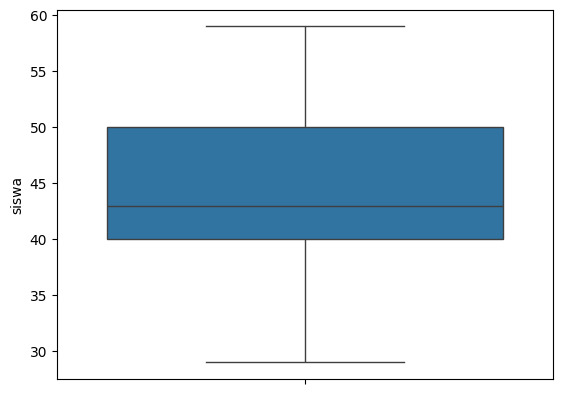

In [ ]:
import seaborn as sns
sns.boxplot(df['siswa'])


# ARIMA


=== DATA NORMALIZATION ===

Data sebelum normalisasi:
count    21.000000
mean     43.428571
std       7.612959
min      29.000000
25%      40.000000
50%      43.000000
75%      50.000000
max      59.000000
Name: siswa, dtype: float64

5 data pertama sebelum normalisasi:
tahun
2004-01-01    42
2005-01-01    40
2006-01-01    43
2007-01-01    45
2008-01-01    50
Name: siswa, dtype: int64

Data setelah normalisasi:
       siswa_normalized
count         21.000000
mean           0.480952
std            0.253765
min            0.000000
25%            0.366667
50%            0.466667
75%            0.700000
max            1.000000

5 data pertama setelah normalisasi:
            siswa_normalized
tahun                       
2004-01-01          0.433333
2005-01-01          0.366667
2006-01-01          0.466667
2007-01-01          0.533333
2008-01-01          0.700000


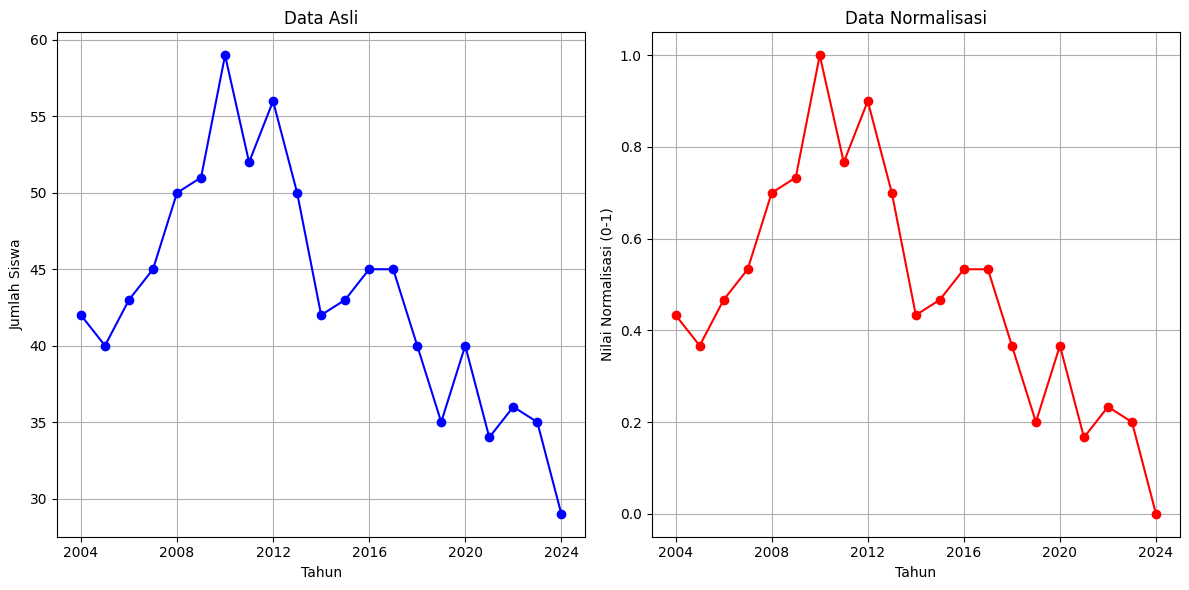


Waktu training/testing: 0.10 detik

Evaluasi Hasil Testing:
The Root Mean Square Error is: 3.5388
The Mean Absolute Error is: 2.5642
The Mean Absolute Percentage Error is: 7.727%


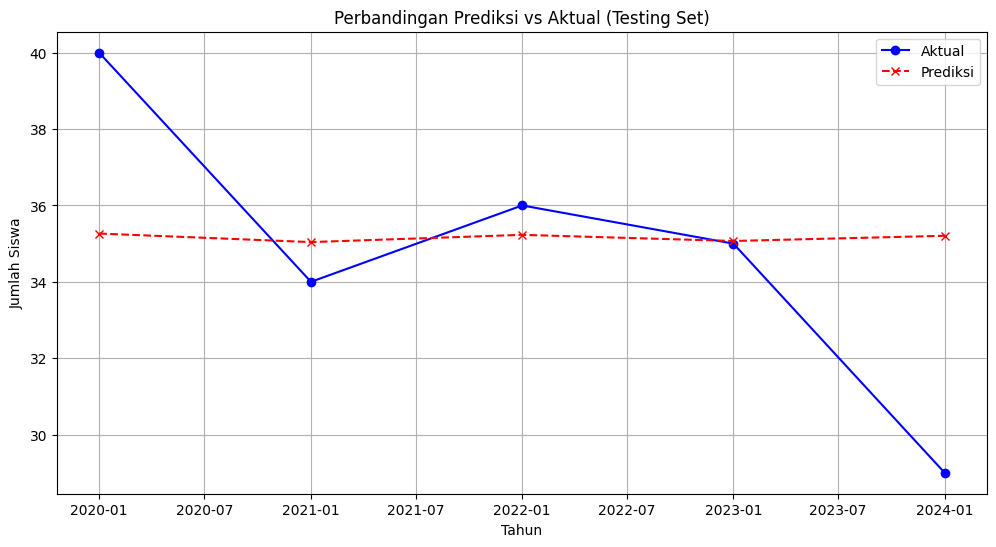


Prediksi 5 Tahun ke Depan:
Tahun 2025: 30.1 siswa
Tahun 2026: 29.6 siswa
Tahun 2027: 29.8 siswa
Tahun 2028: 29.7 siswa
Tahun 2029: 29.8 siswa


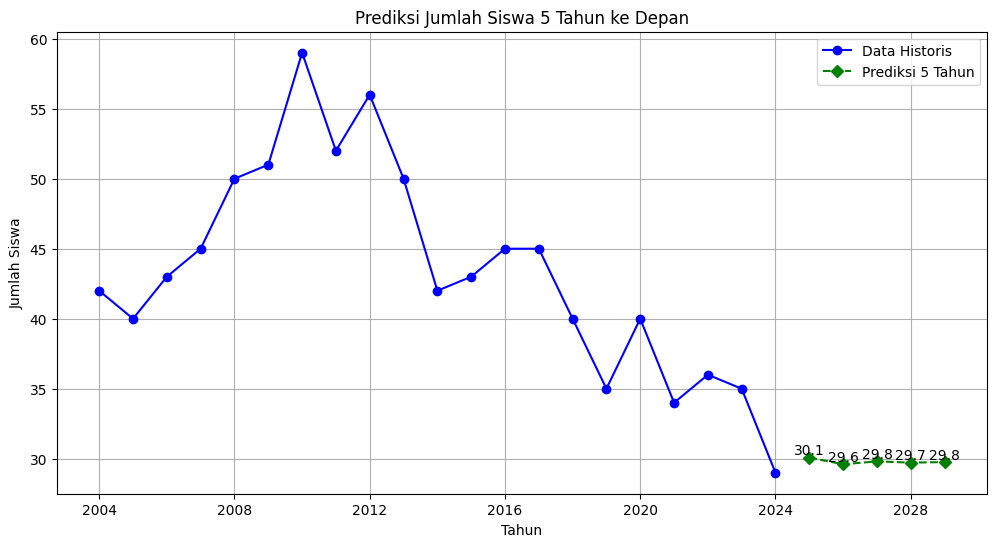

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

# 1. Data Normalization
print("=== DATA NORMALIZATION ===")
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(df[['siswa']])

# Create dataframe for normalized data
df_normalized = pd.DataFrame(data_normalized, columns=['siswa_normalized'], index=df.index)

print("\nData sebelum normalisasi:")
print(df['siswa'].describe())
print("\n5 data pertama sebelum normalisasi:")
print(df['siswa'].head())

print("\nData setelah normalisasi:")
print(df_normalized.describe())
print("\n5 data pertama setelah normalisasi:")
print(df_normalized.head())

# Visualisasi perbandingan
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df.index, df['siswa'], 'b-', marker='o')
plt.title('Data Asli')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Siswa')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(df_normalized.index, df_normalized['siswa_normalized'], 'r-', marker='o')
plt.title('Data Normalisasi')
plt.xlabel('Tahun')
plt.ylabel('Nilai Normalisasi (0-1)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Splitting Data 80:20 (using normalized data)
data = data_normalized.flatten()
split_index = int(len(data) * 0.8)
train, test = data[:split_index], data[split_index:]

# 3. Model ARIMA
start_time = time.time()
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
predictions_normalized = model_fit.forecast(steps=len(test))
end_time = time.time()

# Convert back to original scale
predictions = scaler.inverse_transform(predictions_normalized.reshape(-1, 1)).flatten()
test_actual = scaler.inverse_transform(test.reshape(-1, 1)).flatten()

# Waktu training/testing
train_duration = end_time - start_time
print(f"\nWaktu training/testing: {train_duration:.2f} detik")

# 4. Evaluasi
rmse = sqrt(mean_squared_error(test_actual, predictions))
mae = mean_absolute_error(test_actual, predictions)
mape = np.mean(np.abs((test_actual - predictions) / test_actual)) * 100

print("\nEvaluasi Hasil Testing:")
print(f"The Root Mean Square Error is: {rmse:.4f}")
print(f"The Mean Absolute Error is: {mae:.4f}")
print(f"The Mean Absolute Percentage Error is: {mape:.3f}%")

# Simpan results
ArimaResults = {
    "normalization": {
        "min": scaler.data_min_[0],
        "max": scaler.data_max_[0]
    },
    "evaluation": {
        "rmse": rmse,
        "mae": mae,
        "mape": mape,
        "training_time": train_duration
    }
}

# 5. Visualisasi hasil testing
test_index = df.index[split_index:]
plt.figure(figsize=(12, 6))
plt.plot(test_index, test_actual, 'b-', label='Aktual', marker='o')
plt.plot(test_index, predictions, 'r--', label='Prediksi', marker='x')
plt.title('Perbandingan Prediksi vs Aktual (Testing Set)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Siswa')
plt.legend()
plt.grid(True)
plt.show()

# 6. Prediksi 5 tahun ke depan (using all normalized data)
model_full = ARIMA(data, order=(1,1,1))
model_full_fit = model_full.fit()
forecast_normalized = model_full_fit.forecast(steps=5)
forecast = scaler.inverse_transform(forecast_normalized.reshape(-1, 1)).flatten()
future_years = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=5, freq='YS')

# Print predictions
print("\nPrediksi 5 Tahun ke Depan:")
for year, pred in zip(future_years.year, forecast):
    print(f"Tahun {year}: {pred:.1f} siswa")

# 7. Visualisasi prediksi masa depan
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['siswa'], 'b-', label='Data Historis', marker='o')
plt.plot(future_years, forecast, 'g--', label='Prediksi 5 Tahun', marker='D')
plt.title('Prediksi Jumlah Siswa 5 Tahun ke Depan')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Siswa')

# Add prediction values on plot
for i, (year, pred) in enumerate(zip(future_years, forecast)):
    plt.text(year, pred, f'{pred:.1f}', ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.show()

# LSTM

=== DATA NORMALIZATION ===

Data sebelum normalisasi:
count    21.000000
mean     43.428571
std       7.612959
min      29.000000
25%      40.000000
50%      43.000000
75%      50.000000
max      59.000000
Name: siswa, dtype: float64

5 data pertama sebelum normalisasi:
tahun
2004-01-01    42
2005-01-01    40
2006-01-01    43
2007-01-01    45
2008-01-01    50
Name: siswa, dtype: int64

Data setelah normalisasi:
       siswa_normalized
count         21.000000
mean           0.480952
std            0.253765
min            0.000000
25%            0.366667
50%            0.466667
75%            0.700000
max            1.000000

5 data pertama setelah normalisasi:
            siswa_normalized
tahun                       
2004-01-01          0.433333
2005-01-01          0.366667
2006-01-01          0.466667
2007-01-01          0.533333
2008-01-01          0.700000


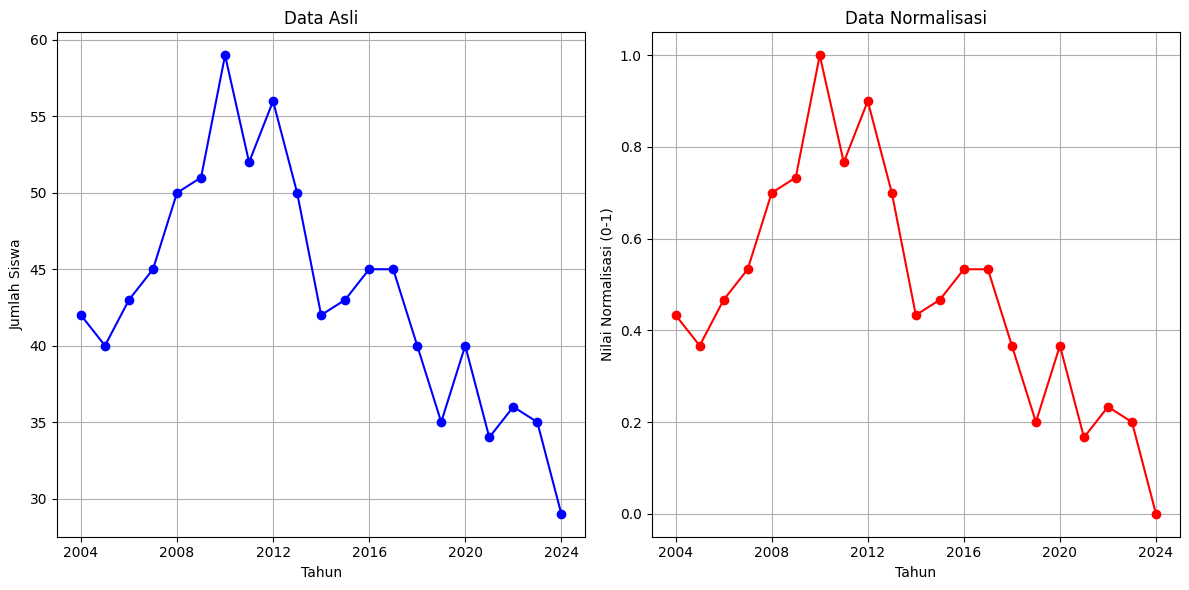


=== SUMMARY MODEL LSTM ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                  │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.3967
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1776
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1104
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0544 
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0394
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0639 
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0319 
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0267 
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0416 
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0369 
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0381 
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0307 
Epoch 13/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0371 
Epoch 14/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0420 
Epoch 15/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0313 
Epoch 16/200
7/7 ━━

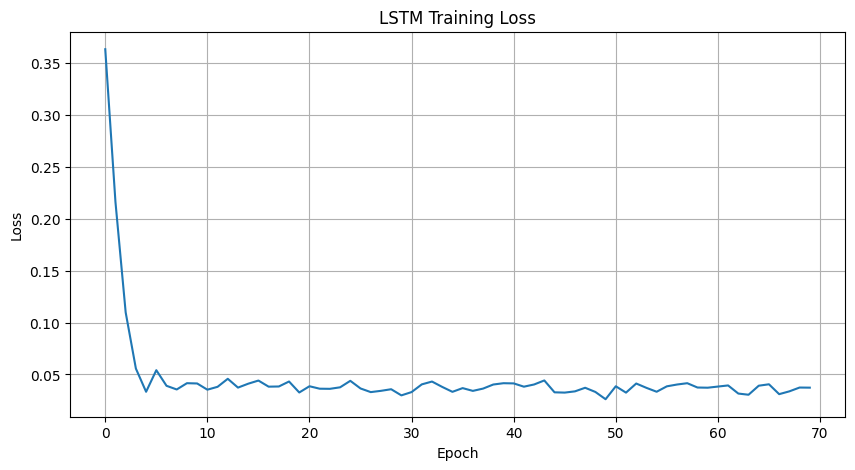

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step

Evaluasi Hasil Testing LSTM:
Waktu Training: 10.83 detik
The Root Mean Square Error is: 7.6323
The Mean Absolute Error is: 7.2390
The Mean Absolute Percentage Error is: 22.373%


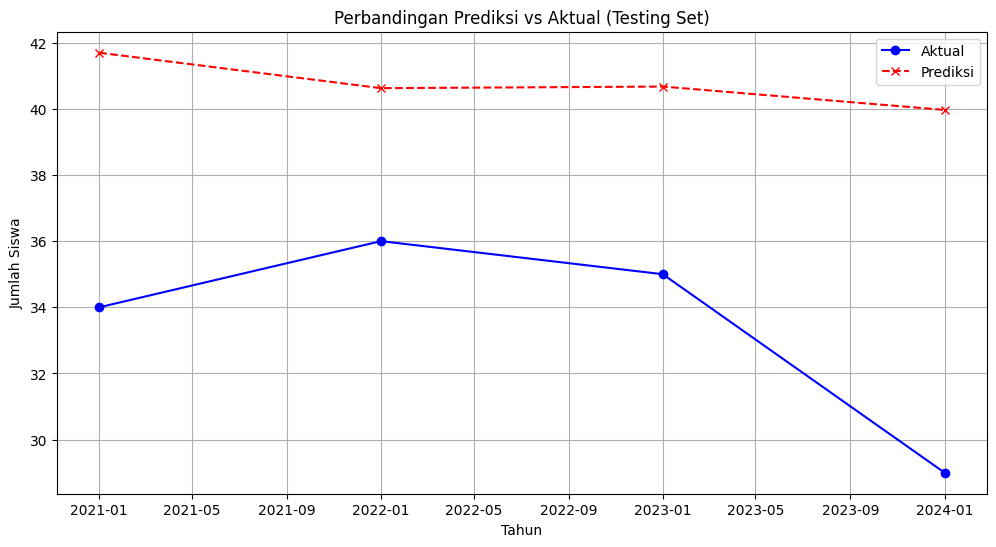


Prediksi 5 Tahun ke Depan:
Tahun 2025: 38.8 siswa
Tahun 2026: 39.6 siswa
Tahun 2027: 40.7 siswa
Tahun 2028: 42.5 siswa
Tahun 2029: 43.2 siswa


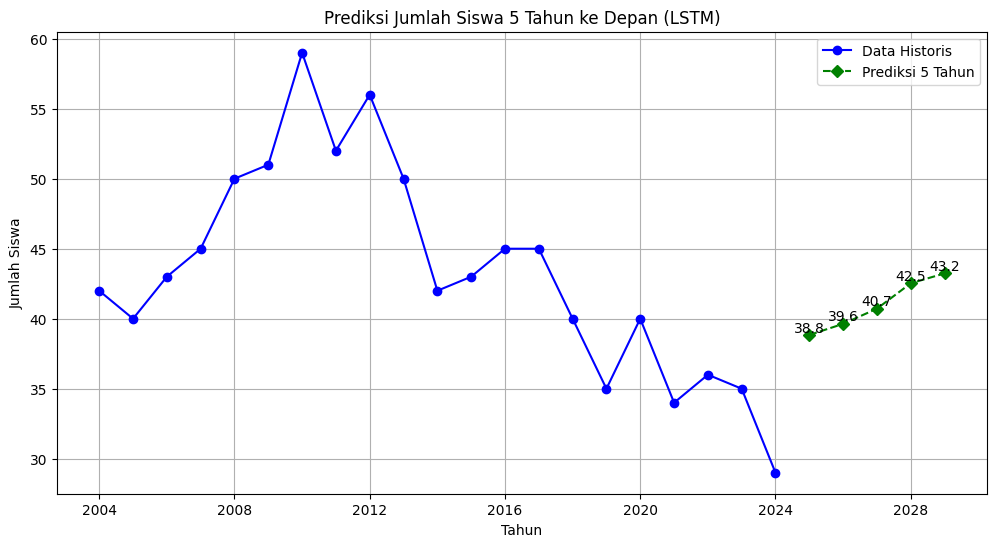

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from math import sqrt

# 1. Data Normalization
print("=== DATA NORMALIZATION ===")
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(df[['siswa']])

# Create dataframe for normalized data
df_normalized = pd.DataFrame(data_normalized, columns=['siswa_normalized'], index=df.index)

print("\nData sebelum normalisasi:")
print(df['siswa'].describe())
print("\n5 data pertama sebelum normalisasi:")
print(df['siswa'].head())

print("\nData setelah normalisasi:")
print(df_normalized.describe())
print("\n5 data pertama setelah normalisasi:")
print(df_normalized.head())

# Visualisasi perbandingan
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df.index, df['siswa'], 'b-', marker='o')
plt.title('Data Asli')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Siswa')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(df_normalized.index, df_normalized['siswa_normalized'], 'r-', marker='o')
plt.title('Data Normalisasi')
plt.xlabel('Tahun')
plt.ylabel('Nilai Normalisasi (0-1)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Membuat Dataset untuk LSTM
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 3
X, y = create_dataset(data_normalized, look_back)

# Reshape data untuk LSTM [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# 3. Train-Test Split 80:20
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 4. Membangun Model LSTM dengan Dropout
model = Sequential()
model.add(LSTM(100, activation='tanh', input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

print("\n=== SUMMARY MODEL LSTM ===")
model.summary()

# 5. Training dengan Early Stopping
early_stop = EarlyStopping(monitor='loss', patience=20, verbose=1)

start_time = time.time()
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=2,
    verbose=1,
    callbacks=[early_stop]
)
train_duration = time.time() - start_time


# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.title('LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# 6. Prediksi pada Data Train dan Test
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform hasil prediksi dan data aktual
train_predict_inv = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict_inv = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 7. Evaluasi Model
rmse = sqrt(mean_squared_error(y_test_actual, test_predict_inv))
mae = mean_absolute_error(y_test_actual, test_predict_inv)
mape = np.mean(np.abs((y_test_actual - test_predict_inv) / y_test_actual)) * 100

print("\nEvaluasi Hasil Testing LSTM:")
print(f"Waktu Training: {train_duration:.2f} detik")
print(f"The Root Mean Square Error is: {rmse:.4f}")
print(f"The Mean Absolute Error is: {mae:.4f}")
print(f"The Mean Absolute Percentage Error is: {mape:.3f}%")

# 11. Simpan hasil evaluasi
LstmResults = {
    "normalization": {
        "min": scaler.data_min_[0],
        "max": scaler.data_max_[0]
    },
    "evaluation": {
        "rmse": rmse,
        "mae": mae,
        "mape": mape,
        "training_time": train_duration
    }
}

# 8. Visualisasi hasil testing
test_index = df.index[split_index + look_back:]
plt.figure(figsize=(12, 6))
plt.plot(test_index, y_test_actual, 'b-', label='Aktual', marker='o')
plt.plot(test_index, test_predict_inv, 'r--', label='Prediksi', marker='x')
plt.title('Perbandingan Prediksi vs Aktual (Testing Set)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Siswa')
plt.legend()
plt.grid(True)
plt.show()

# 9. Prediksi 5 tahun ke depan (dengan model dan data penuh)
last_sequence = data_normalized[-look_back:].reshape((1, look_back, 1))
future_predictions = []

for _ in range(5):
    next_pred = model.predict(last_sequence, verbose=0)[0][0]
    future_predictions.append(next_pred)
    last_sequence = np.append(last_sequence[:, 1:, :], [[[next_pred]]], axis=1)

future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()
future_years = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=5, freq='YS')

# Print prediksi masa depan
print("\nPrediksi 5 Tahun ke Depan:")
for year, pred in zip(future_years.year, future_predictions_inv):
    print(f"Tahun {year}: {pred:.1f} siswa")

# 10. Visualisasi prediksi masa depan
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['siswa'], 'b-', label='Data Historis', marker='o')
plt.plot(future_years, future_predictions_inv, 'g--', label='Prediksi 5 Tahun', marker='D')
plt.title('Prediksi Jumlah Siswa 5 Tahun ke Depan (LSTM)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Siswa')

# Tambahkan nilai prediksi di plot
for i, (year, pred) in enumerate(zip(future_years, future_predictions_inv)):
    plt.text(year, pred, f'{pred:.1f}', ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.show()

# GRU

=== DATA NORMALIZATION ===

Data sebelum normalisasi:
count    21.000000
mean     43.428571
std       7.612959
min      29.000000
25%      40.000000
50%      43.000000
75%      50.000000
max      59.000000
Name: siswa, dtype: float64

5 data pertama sebelum normalisasi:
tahun
2004-01-01    42
2005-01-01    40
2006-01-01    43
2007-01-01    45
2008-01-01    50
Name: siswa, dtype: int64

Data setelah normalisasi:
       siswa_normalized
count         21.000000
mean           0.480952
std            0.253765
min            0.000000
25%            0.366667
50%            0.466667
75%            0.700000
max            1.000000

5 data pertama setelah normalisasi:
            siswa_normalized
tahun                       
2004-01-01          0.433333
2005-01-01          0.366667
2006-01-01          0.466667
2007-01-01          0.533333
2008-01-01          0.700000


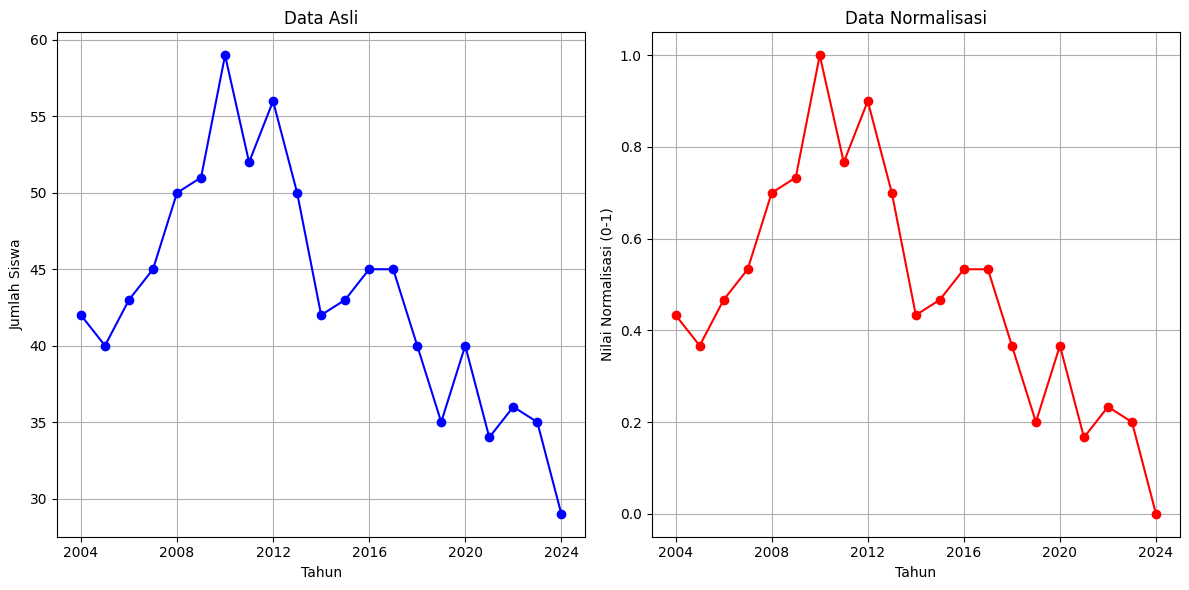


=== SUMMARY MODEL GRU ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_14 (GRU)                    │ (None, 3, 150)         │        68,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 3, 150)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_15 (GRU)                    │ (None, 75)             │        51,075 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,001 (468.75 KB)

 Trainable params: 120,001 (468.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.2509
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0449
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0381
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0381
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0331
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0470
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0251
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0339
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0823
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0297
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0457
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0557
Epoch 13/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0605
Epoch 14/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0415
Epoch 15/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0380
Epoch 16/200
7/7 ━━

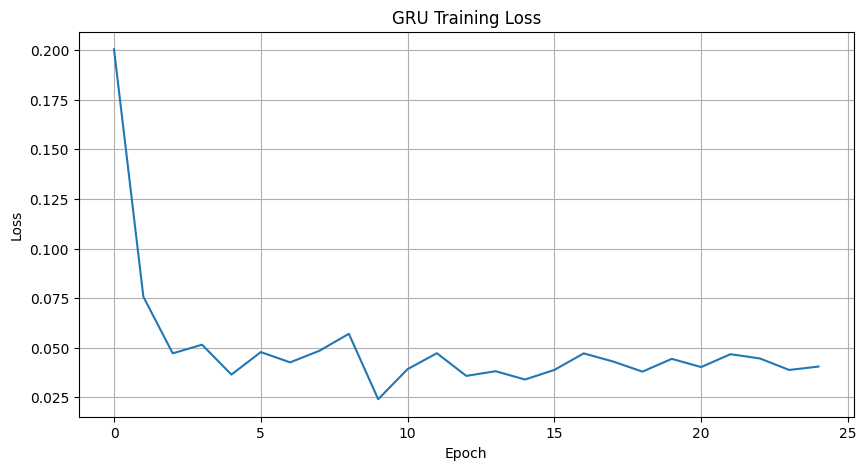

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step

Evaluasi Hasil Testing GRU:
Waktu Training: 7.82 detik
The Root Mean Square Error is: 6.5380
The Mean Absolute Error is: 6.0532
The Mean Absolute Percentage Error is: 18.819%


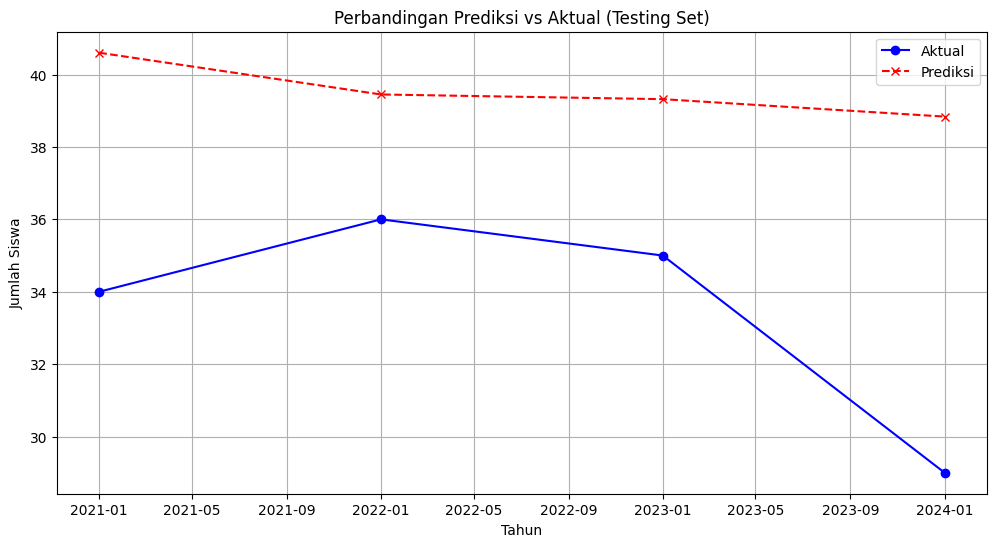


Prediksi 5 Tahun ke Depan:
Tahun 2025: 37.2 siswa
Tahun 2026: 38.2 siswa
Tahun 2027: 39.4 siswa
Tahun 2028: 40.8 siswa
Tahun 2029: 41.5 siswa


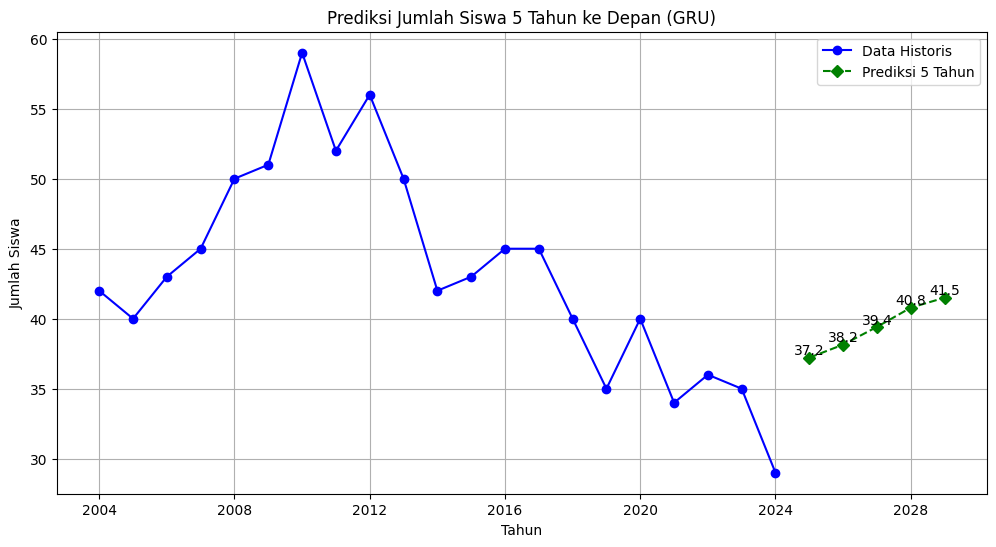

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from math import sqrt


# 1. Data Normalization
print("=== DATA NORMALIZATION ===")
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(df[['siswa']])

# Create dataframe for normalized data
df_normalized = pd.DataFrame(data_normalized, columns=['siswa_normalized'], index=df.index)

print("\nData sebelum normalisasi:")
print(df['siswa'].describe())
print("\n5 data pertama sebelum normalisasi:")
print(df['siswa'].head())

print("\nData setelah normalisasi:")
print(df_normalized.describe())
print("\n5 data pertama setelah normalisasi:")
print(df_normalized.head())

# Visualisasi perbandingan
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df.index, df['siswa'], 'b-', marker='o')
plt.title('Data Asli')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Siswa')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(df_normalized.index, df_normalized['siswa_normalized'], 'r-', marker='o')
plt.title('Data Normalisasi')
plt.xlabel('Tahun')
plt.ylabel('Nilai Normalisasi (0-1)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Membuat Dataset untuk GRU
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 3
X, y = create_dataset(data_normalized, look_back)

# Reshape data untuk GRU [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# 3. Train-Test Split 80:20
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 4. Membangun Model GRU dengan Dropout
model = Sequential()
model.add(GRU(150, activation='tanh', input_shape=(look_back, 1), return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(75, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

print("\n=== SUMMARY MODEL GRU ===")
model.summary()

# 5. Training dengan Early Stopping
early_stop = EarlyStopping(monitor='loss', patience=15, verbose=1)

start_time = time.time()
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=2,
    verbose=1,
    callbacks=[early_stop]
)
train_duration = time.time() - start_time


# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.title('GRU Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# 6. Prediksi pada Data Train dan Test
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform hasil prediksi dan data aktual
train_predict_inv = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict_inv = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 7. Evaluasi Model
gru_rmse = sqrt(mean_squared_error(y_test_actual, test_predict_inv))
gru_mae = mean_absolute_error(y_test_actual, test_predict_inv)
gru_mape = np.mean(np.abs((y_test_actual - test_predict_inv) / y_test_actual)) * 100

print("\nEvaluasi Hasil Testing GRU:")
print(f"Waktu Training: {train_duration:.2f} detik")
print(f"The Root Mean Square Error is: {gru_rmse:.4f}")
print(f"The Mean Absolute Error is: {gru_mae:.4f}")
print(f"The Mean Absolute Percentage Error is: {gru_mape:.3f}%")

# Simpan hasil evaluasi
GruResults = {
    "normalization": {
        "min": scaler.data_min_[0],
        "max": scaler.data_max_[0]
    },
    "evaluation": {
        "rmse": gru_rmse,
        "mae": gru_mae,
        "mape": gru_mape,
        "training_time": train_duration
    }
}

# 8. Visualisasi hasil testing
test_index = df.index[split_index + look_back:] # Menggunakan split_index
plt.figure(figsize=(12, 6))
plt.plot(test_index, y_test_actual, 'b-', label='Aktual', marker='o')
plt.plot(test_index, test_predict_inv, 'r--', label='Prediksi', marker='x')
plt.title('Perbandingan Prediksi vs Aktual (Testing Set)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Siswa')
plt.legend()
plt.grid(True)
plt.show()

# 9. Prediksi 5 tahun ke depan (dengan model dan data penuh)
last_sequence = data_normalized[-look_back:].reshape((1, look_back, 1))
future_predictions = []

for _ in range(5):
    next_pred = model.predict(last_sequence, verbose=0)[0][0]
    future_predictions.append(next_pred)
    last_sequence = np.append(last_sequence[:, 1:, :], [[[next_pred]]], axis=1)

future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()
future_years = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=5, freq='YS')

# Print prediksi masa depan
print("\nPrediksi 5 Tahun ke Depan:")
for year, pred in zip(future_years.year, future_predictions_inv):
    print(f"Tahun {year}: {pred:.1f} siswa")

# 10. Visualisasi prediksi masa depan
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['siswa'], 'b-', label='Data Historis', marker='o')
plt.plot(future_years, future_predictions_inv, 'g--', label='Prediksi 5 Tahun', marker='D')
plt.title('Prediksi Jumlah Siswa 5 Tahun ke Depan (GRU)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Siswa')

# Tambahkan nilai prediksi di plot
for i, (year, pred) in enumerate(zip(future_years, future_predictions_inv)):
    plt.text(year, pred, f'{pred:.1f}', ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.show()



In [ ]:
print(ArimaResults)
print(LstmResults)
print(GruResults)

{'normalization': {'min': np.float64(29.0), 'max': np.float64(59.0)}, 'evaluation': {'rmse': 3.5388257790585294, 'mae': 2.5641611572132206, 'mape': np.float64(7.726811683019938), 'training_time': 0.09706568717956543}}
{'normalization': {'min': np.float64(29.0), 'max': np.float64(59.0)}, 'evaluation': {'rmse': 7.632333829818463, 'mae': 7.239040374755859, 'mape': np.float64(22.373489470279065), 'training_time': 10.828269720077515}}
{'normalization': {'min': np.float64(29.0), 'max': np.float64(59.0)}, 'evaluation': {'rmse': 6.53796343636979, 'mae': 6.053210258483887, 'mape': np.float64(18.81920535326687), 'training_time': 7.823688983917236}}


# Perbandingan Hasil ARIMA LSTM GRU

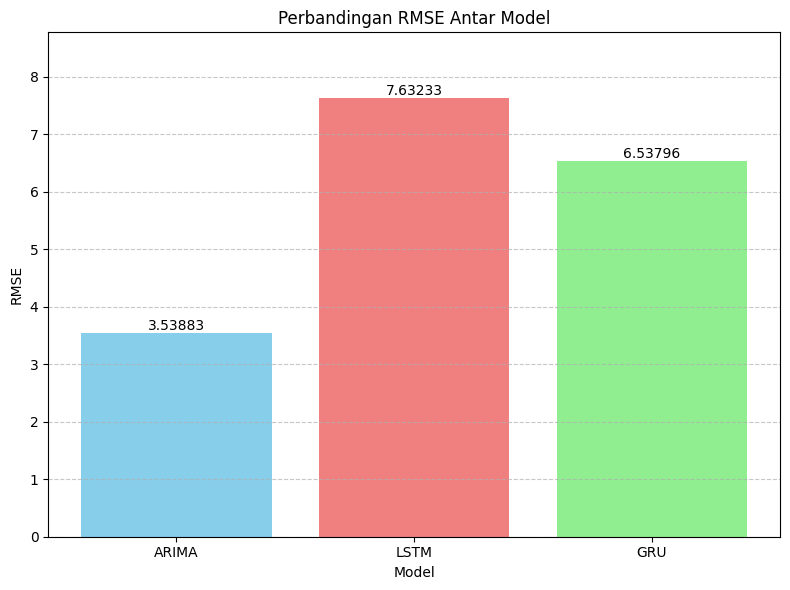

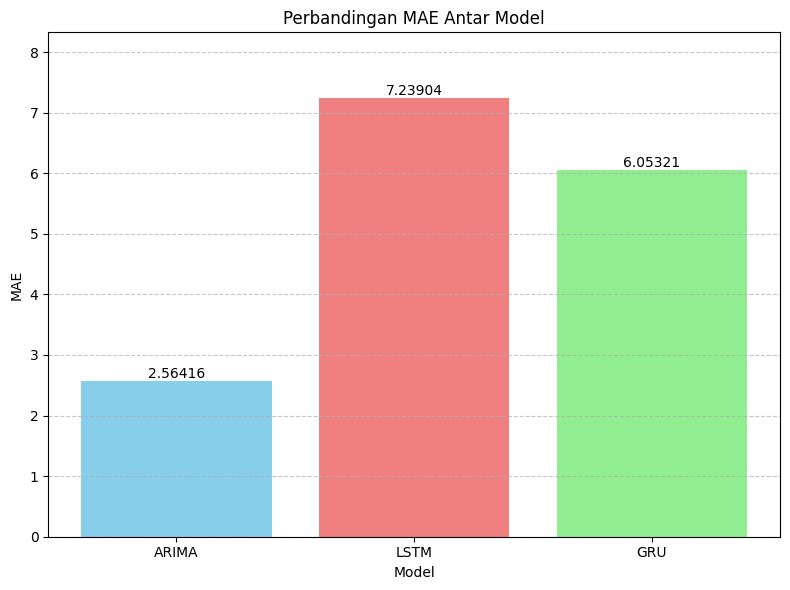

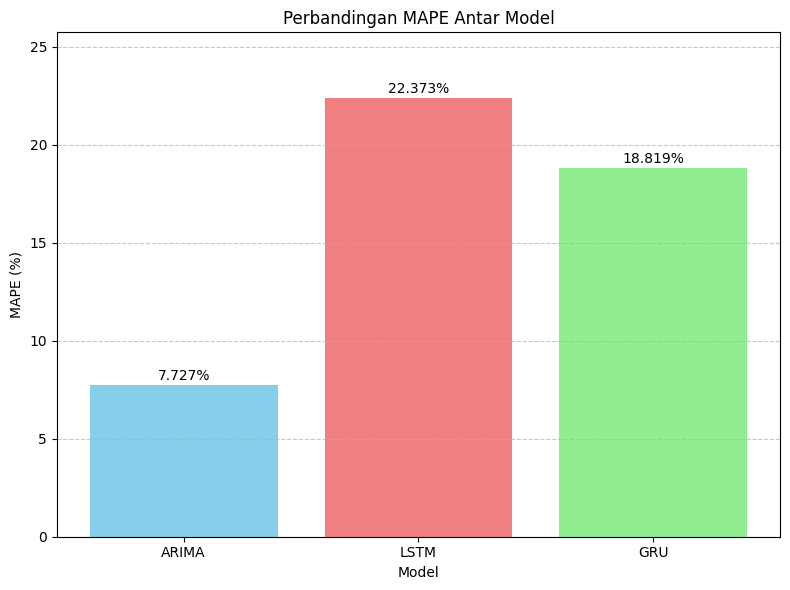

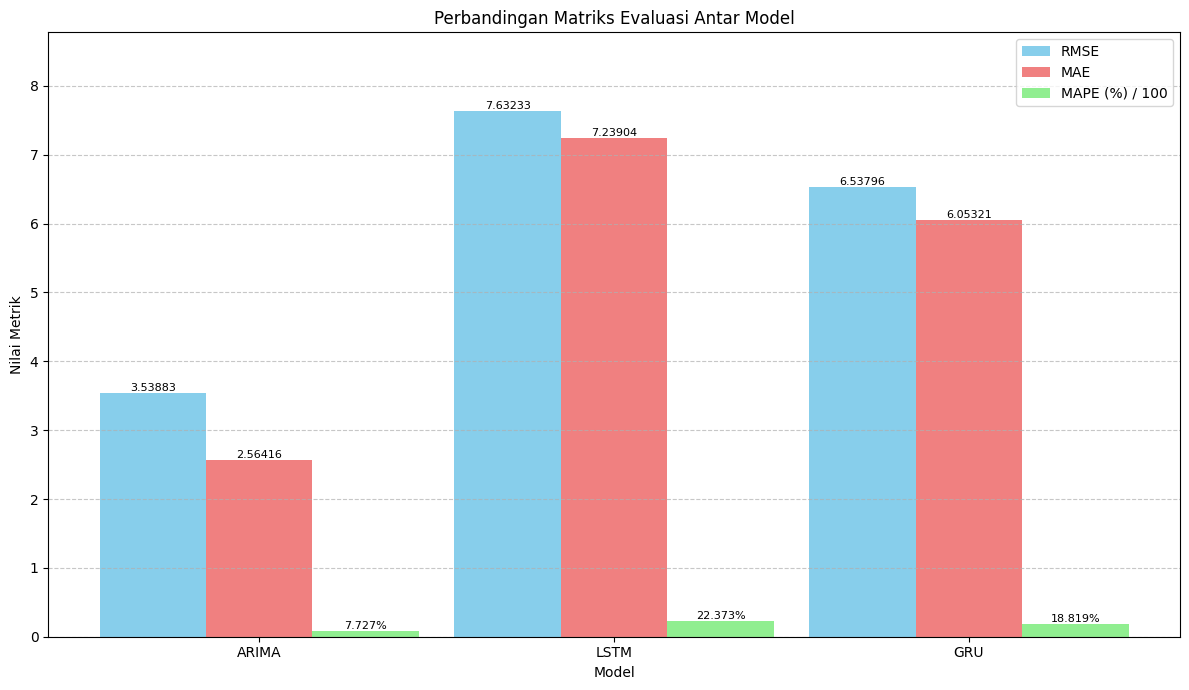

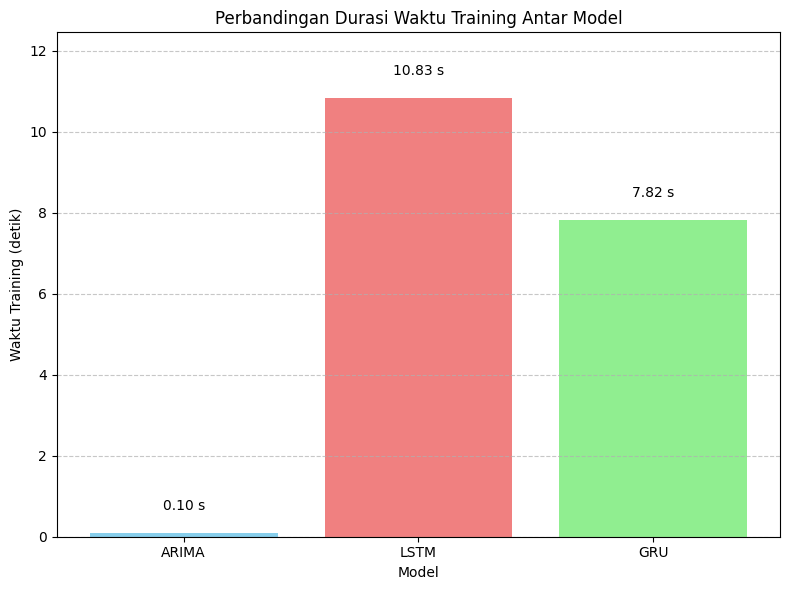


--- Tabel Perbandingan Matriks Evaluasi ---
MODEL     RMSE      MAE    MAPE
ARIMA 3.538826 2.564161  7.727%
 LSTM 7.632334 7.239040 22.373%
  GRU 6.537963 6.053210 18.819%

--- Tabel Selisih Nilai Model ---
     MODEL  RMSE Selisih  MAE Selisih MAPE Selisih
ARIMA-LSTM     -4.093508    -4.674879     -14.647%
 ARIMA-GRU     -2.999138    -3.489049     -11.092%
  LSTM-GRU      1.094370     1.185830       3.554%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Ekstraksi Metrik Evaluasi ---
models = ['ARIMA', 'LSTM', 'GRU']
rmse_values = [ArimaResults['evaluation']['rmse'], LstmResults['evaluation']['rmse'], GruResults['evaluation']['rmse']]
mae_values = [ArimaResults['evaluation']['mae'], LstmResults['evaluation']['mae'], GruResults['evaluation']['mae']]
mape_values = [ArimaResults['evaluation']['mape'], LstmResults['evaluation']['mape'], GruResults['evaluation']['mape']]
training_times = [ArimaResults['evaluation']['training_time'], LstmResults['evaluation']['training_time'], GruResults['evaluation']['training_time']]

# --- 1. Plot Perbandingan RMSE ---
plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Perbandingan RMSE Antar Model')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.0001, f'{v:.5f}', ha='center', va='bottom')
plt.ylim(top=max(rmse_values) * 1.15)
plt.tight_layout()
plt.show()

# --- 2. Plot Perbandingan MAE ---
plt.figure(figsize=(8, 6))
plt.bar(models, mae_values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Perbandingan MAE Antar Model')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(mae_values):
    plt.text(i, v + 0.0001, f'{v:.5f}', ha='center', va='bottom')
plt.ylim(top=max(mae_values) * 1.15)
plt.tight_layout()
plt.show()

# --- 3. Plot Perbandingan MAPE ---
plt.figure(figsize=(8, 6))
plt.bar(models, mape_values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Perbandingan MAPE Antar Model')
plt.xlabel('Model')
plt.ylabel('MAPE (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(mape_values):
    plt.text(i, v + 0.1, f'{v:.3f}%', ha='center', va='bottom')
plt.ylim(top=max(mape_values) * 1.15)
plt.tight_layout()
plt.show()

# --- 4. Plot Perbandingan RMSE, MAE, MAPE dalam Satu Plot ---
x = np.arange(len(models))
width = 0.3

plt.figure(figsize=(12, 7))
plt.bar(x - width, rmse_values, width, label='RMSE', color='skyblue')
plt.bar(x, mae_values, width, label='MAE', color='lightcoral')
plt.bar(x + width, [m / 100 for m in mape_values], width, label='MAPE (%) / 100', color='lightgreen') # MAPE dibagi 100 agar skalanya mendekati RMSE/MAE

plt.title('Perbandingan Matriks Evaluasi Antar Model')
plt.xlabel('Model')
plt.ylabel('Nilai Metrik')
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan nilai di atas bar (opsional, bisa padat jika banyak data)
for i in range(len(models)):
    plt.text(x[i] - width, rmse_values[i] + 0.0001, f'{rmse_values[i]:.5f}', ha='center', va='bottom', fontsize=8)
    plt.text(x[i], mae_values[i] + 0.0001, f'{mae_values[i]:.5f}', ha='center', va='bottom', fontsize=8)
    plt.text(x[i] + width, (mape_values[i] / 100) + 0.0001, f'{mape_values[i]:.3f}%', ha='center', va='bottom', fontsize=8)
plt.ylim(top=max(max(rmse_values), max(mae_values), max([m/100 for m in mape_values])) * 1.15)
plt.tight_layout()
plt.show()


# --- 5. Plot Perbandingan Durasi Waktu Training ---
plt.figure(figsize=(8, 6))
plt.bar(models, training_times, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Perbandingan Durasi Waktu Training Antar Model')
plt.xlabel('Model')
plt.ylabel('Waktu Training (detik)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(training_times):
    plt.text(i, v + 0.5, f'{v:.2f} s', ha='center', va='bottom')
plt.ylim(top=max(training_times) * 1.15)
plt.tight_layout()
plt.show()

# --- Tabel Perbandingan Matriks Evaluasi ---
print("\n--- Tabel Perbandingan Matriks Evaluasi ---")
data_eval = {
    'MODEL': models,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'MAPE': [f"{m:.3f}%" for m in mape_values]
}
df_eval = pd.DataFrame(data_eval)
print(df_eval.to_string(index=False)) # Menggunakan to_string untuk menampilkan semua desimal tanpa pemotongan

# --- Tabel Selisih Nilai Model ---
print("\n--- Tabel Selisih Nilai Model ---")

# Menghitung selisih
selisih_lstm_arima_rmse = ArimaResults['evaluation']['rmse'] - LstmResults['evaluation']['rmse']
selisih_lstm_arima_mae = ArimaResults['evaluation']['mae'] - LstmResults['evaluation']['mae']
selisih_lstm_arima_mape = ArimaResults['evaluation']['mape'] - LstmResults['evaluation']['mape']

selisih_gru_arima_rmse = ArimaResults['evaluation']['rmse'] - GruResults['evaluation']['rmse']
selisih_gru_arima_mae = ArimaResults['evaluation']['mae'] - GruResults['evaluation']['mae']
selisih_gru_arima_mape = ArimaResults['evaluation']['mape'] - GruResults['evaluation']['mape']

selisih_lstm_gru_rmse = LstmResults['evaluation']['rmse'] - GruResults['evaluation']['rmse']
selisih_lstm_gru_mae = LstmResults['evaluation']['mae'] - GruResults['evaluation']['mae']
selisih_lstm_gru_mape = LstmResults['evaluation']['mape'] - GruResults['evaluation']['mape']

data_selisih = {
    'MODEL': ['ARIMA-LSTM', 'ARIMA-GRU', 'LSTM-GRU'],
    'RMSE Selisih': [selisih_lstm_arima_rmse, selisih_gru_arima_rmse, selisih_lstm_gru_rmse],
    'MAE Selisih': [selisih_lstm_arima_mae, selisih_gru_arima_mae, selisih_lstm_gru_mae],
    'MAPE Selisih': [f"{s:.3f}%" for s in [selisih_lstm_arima_mape, selisih_gru_arima_mape, selisih_lstm_gru_mape]]
}
df_selisih = pd.DataFrame(data_selisih)
print(df_selisih.to_string(index=False))